In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv(r"D:\ann2\Iris.csv")

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print(df.shape)
print(df.columns)

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.select_dtypes(include="number").skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [15]:
cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

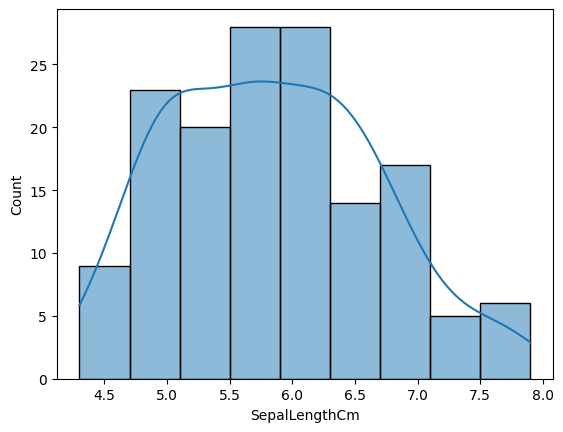

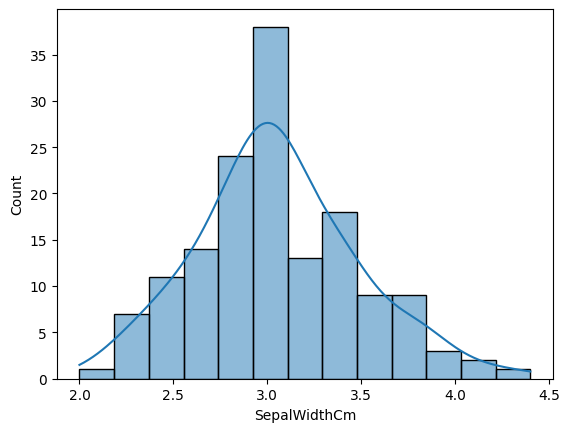

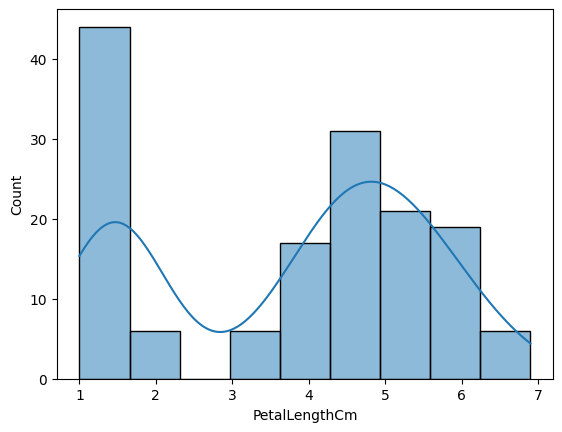

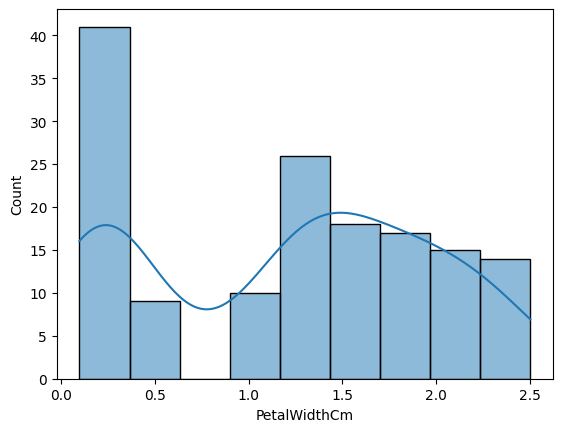

In [16]:
for i in cols:
    sns.histplot(x=i,kde=True,data=df)
    plt.show()

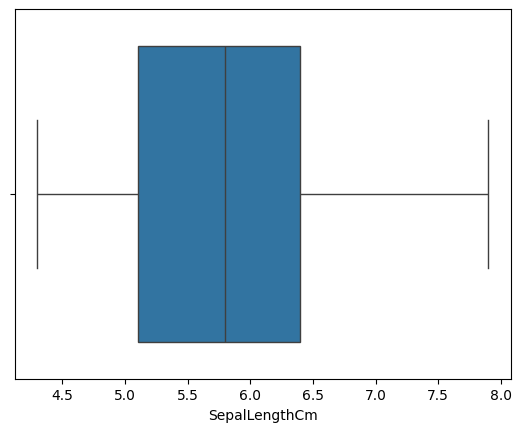

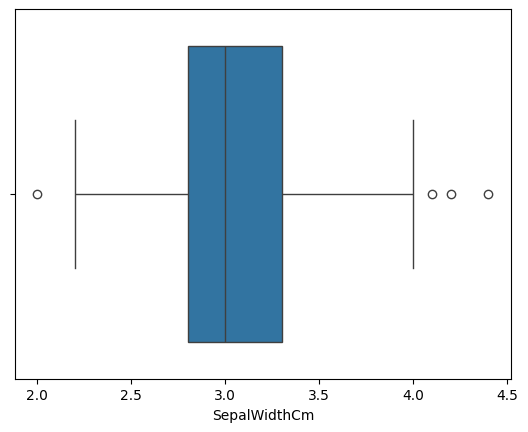

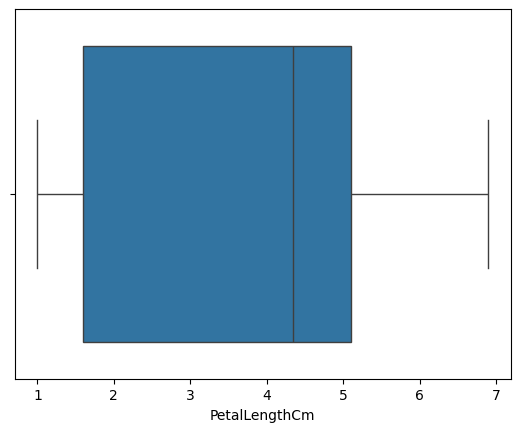

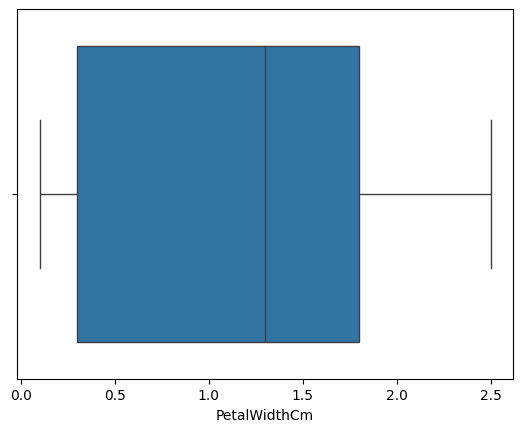

In [17]:
for i in cols:
    sns.boxplot(x=i,data=df)
    plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
pt=LabelEncoder()
df['Species']=pt.fit_transform(df[['Species']])

d:\ANN1\mytensor\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [21]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [22]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential([
      Dense(32, input_dim=4, activation='sigmoid'),
   Dense(16, activation='sigmoid'),
    Dense(3, activation='softmax')  
])

d:\ANN1\mytensor\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=10,
    batch_size=8,
    verbose=1
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3250 - loss: 1.2003 - val_accuracy: 0.3667 - val_loss: 1.1433
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3250 - loss: 1.1398 - val_accuracy: 0.3667 - val_loss: 1.1020
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3333 - loss: 1.1043 - val_accuracy: 0.3667 - val_loss: 1.0796
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3750 - loss: 1.0782 - val_accuracy: 0.4000 - val_loss: 1.0652
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4417 - loss: 1.0639 - val_accuracy: 0.5333 - val_loss: 1.0508
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4833 - loss: 1.0505 - val_accuracy: 0.6000 - val_loss: 1.0382
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6167 - loss: 1.0370 - val_accuracy: 0.7333 - val_loss: 1.0215
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7833 - loss: 1.0215 - val_accuracy: 0.8667 - val_loss

In [29]:
loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Test Accuracy: 0.9333


In [30]:
import pickle

In [31]:
model.save("my_model.h5")

In [32]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [33]:
import numpy as np

CLASS_NAMES = ['setosa', 'versicolor', 'virginica']
np.save("classes.npy", CLASS_NAMES)


In [34]:
classes = np.load("classes.npy", allow_pickle=True)